In [357]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [456]:
## print the top5 records
df = pd.read_csv('train.csv')

In [457]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DATA CLEANING

In [458]:
## print shape of dataset with rows and columns
df.shape

(1460, 81)

In [459]:
len(df['Id'])

1460

since id is unique we don't require it so we drop id column

In [460]:
del df['Id']

In [461]:
df.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

some features almost doesn't have data so we either add data to them or delete the entire column

None of these variables seem to be very important, since most of them are not aspects in which we think about 
when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, 
we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, 
so we'll be happy to delete them.

In [462]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [463]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [464]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [465]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [466]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [467]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

the rest have less null values so we drop the null values 

In [468]:
df.dropna(inplace=True)

In [469]:
df.isnull().sum().max()

0

#### let explore our data

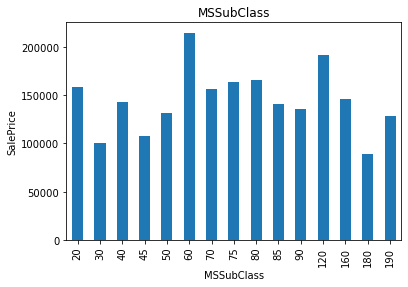

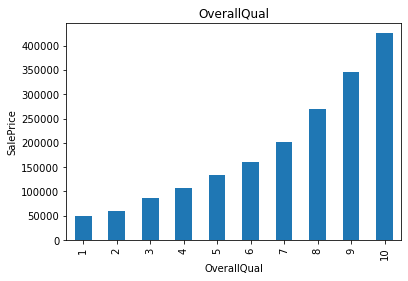

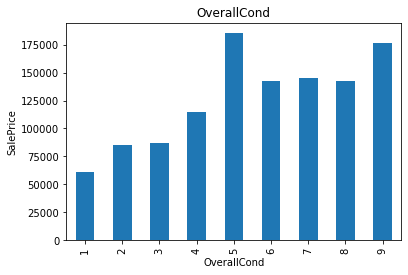

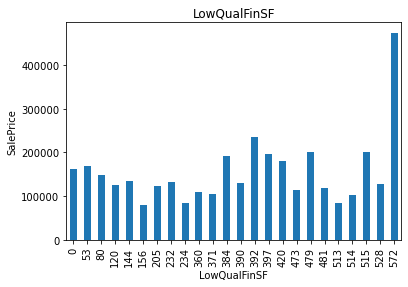

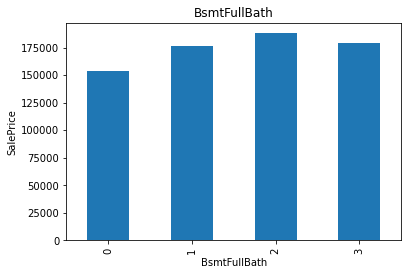

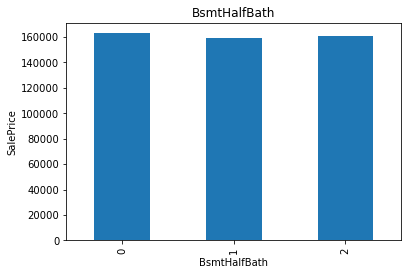

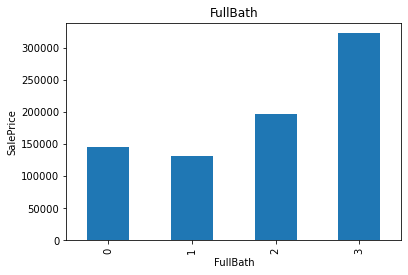

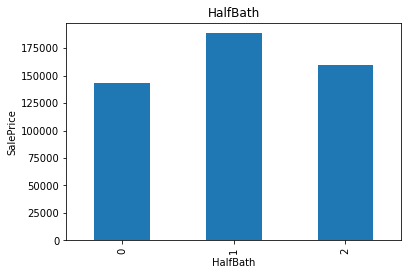

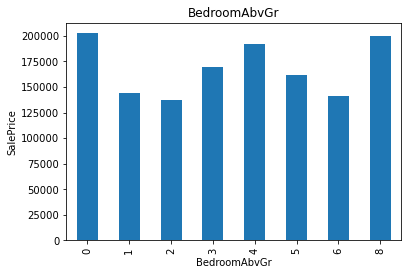

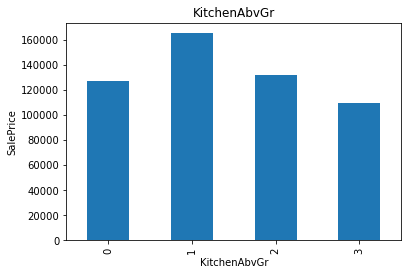

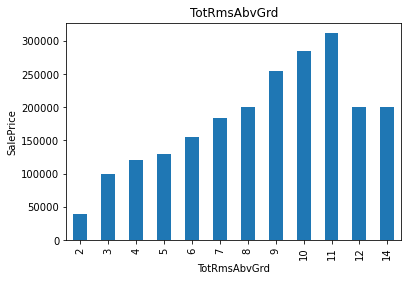

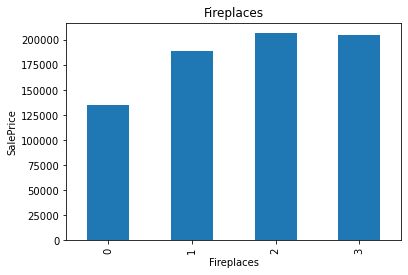

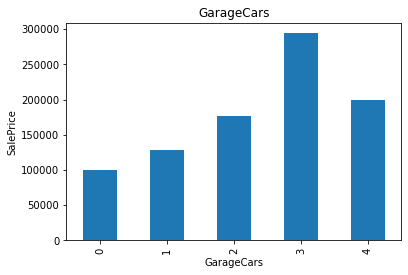

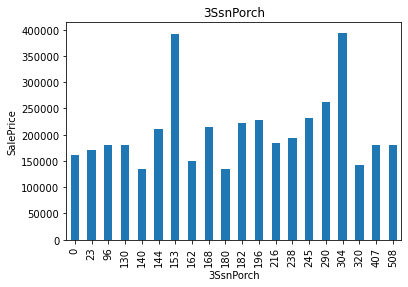

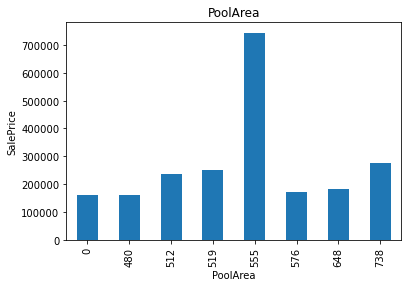

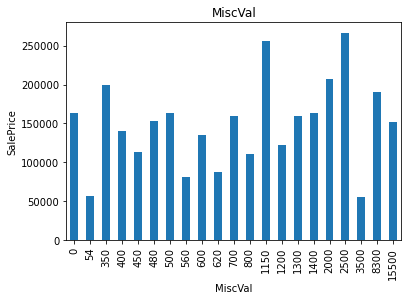

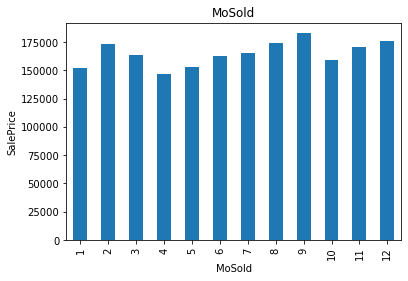

In [470]:
year = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
num = [feature for feature in df.columns if df[feature].dtypes!='O']
num_discrete = [feature for feature in num if len(df[feature].unique())<25 and feature not in year]
for feature in num_discrete:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

as we can see above there is a relationship between variable number and saleprice

C:\Users\fistum graceful\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

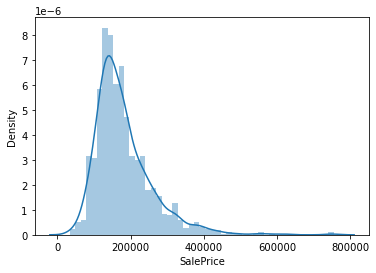

In [471]:
sns.distplot(df['SalePrice'])

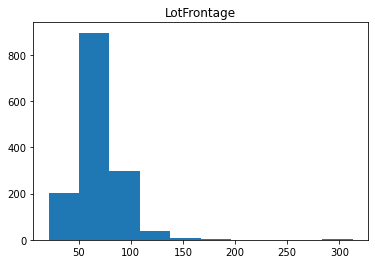

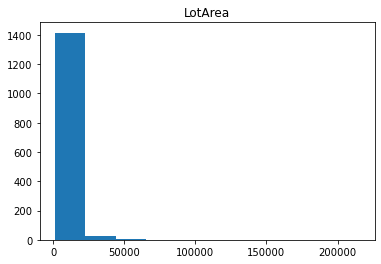

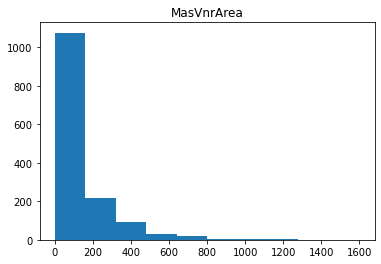

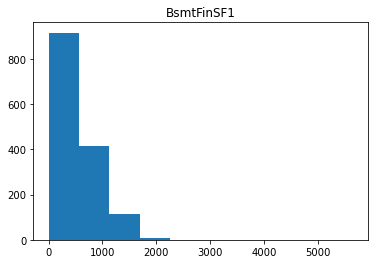

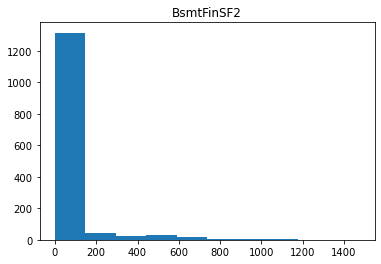

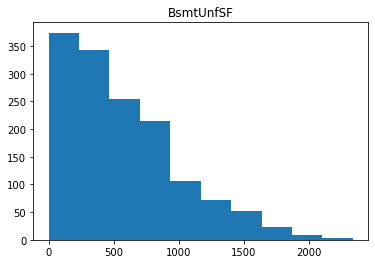

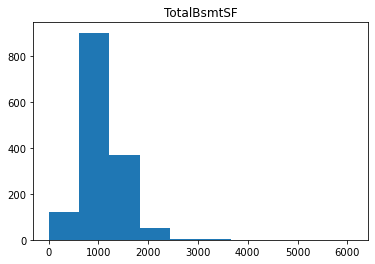

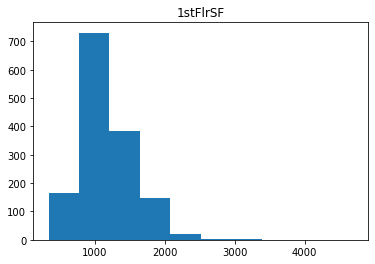

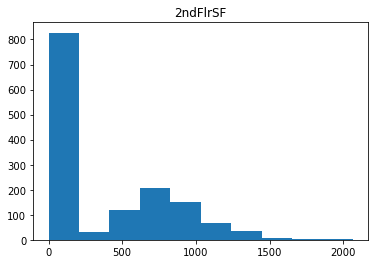

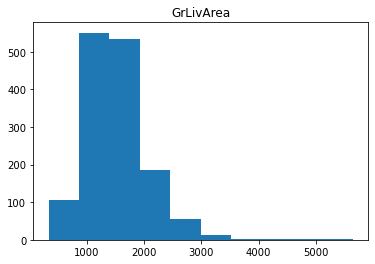

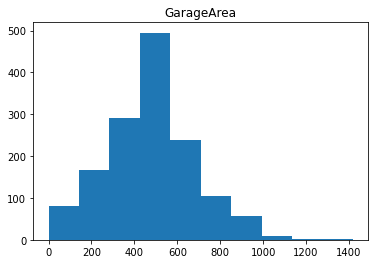

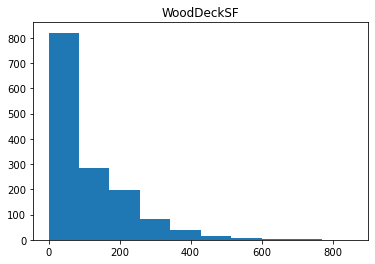

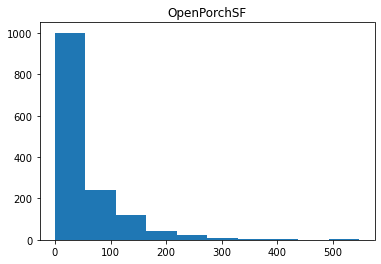

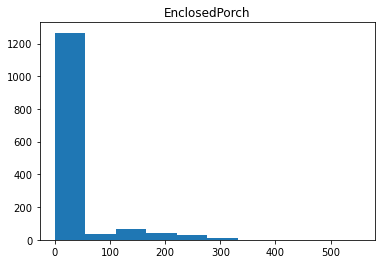

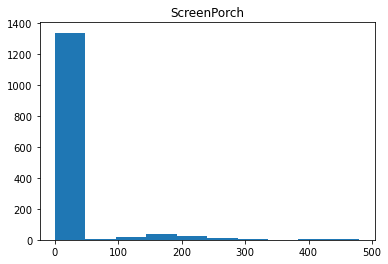

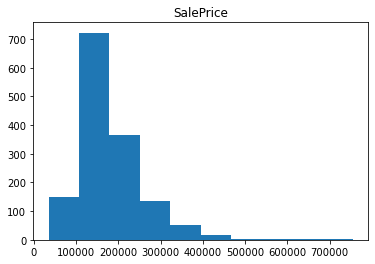

In [472]:
year = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
num = [feature for feature in df.columns if df[feature].dtypes!='O']
num_contnious = [feature for feature in num if len(df[feature].unique())>25 and feature not in year]
for feature in num_contnious:
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

as we can see the continous variables are not normally distributed. so we use logarithmic transformation

In [473]:
for feature in num_contnious:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years 
or no of days. One example in this specific scenario can be difference in years between the year the house was built and
the year the house was sold.

In [474]:
years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
for feature in years:
    df[feature] = df['YrSold'] - df[feature]

In [475]:
df.drop(['YrSold'], axis=1, inplace=True)

In [476]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216


let's see our categorical feature

In [477]:
df_categorical = [feature for feature in df.columns if df[feature].dtypes=='O']
for cols in df_categorical:
    print(cols+ ' : ', df[cols].unique())

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st :  [

We will remove categorical variables that are present less than 1% of the observations

In [478]:
df_categorical = [feature for feature in df.columns if df[feature].dtypes=='O']
for cols in df_categorical:
    print(cols+ ' : ', df[cols].value_counts())

MSZoning :  RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street :  Pave    1445
Grvl       6
Name: Street, dtype: int64
LotShape :  Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour :  Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities :  AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig :  Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope :  Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood :  NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11


we remove some features like 'Street','LandContour','Condition2','RoofStyle' because there is imbalanced data. and also  
you don't think these columns when you want to buy a house

In [479]:
df.drop(['Street','Condition2','RoofStyle'], axis=1, inplace=True)

In [480]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,5,5,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,31,31,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,7,6,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,91,36,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,8,8,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216


converting categorical features to numerical

In [481]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [482]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,0,1,1,0,0,15,3,3,6,7,5,5,5,2,11,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,2,4,4,12.247694
1,20,3,4.382027,9.169518,0,1,1,2,0,20,1,3,4,6,8,31,31,2,6,7,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,5,4,4,12.109011
2,60,3,4.219508,9.328123,1,1,1,0,0,15,3,3,6,7,5,7,6,2,11,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,9,4,4,12.317167
3,70,3,4.094345,9.164296,1,1,1,1,0,17,3,3,6,7,5,91,36,2,4,8,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,2,4,1,11.849398
4,60,3,4.430817,9.565214,1,1,1,2,0,24,3,3,6,8,5,8,8,2,11,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,12,4,4,12.429216


#### FEATURE SCALING

In [483]:
feature_scale=[feature for feature in df.columns if feature not in 'SalePrice']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[feature_scale]=scaler.fit_transform(df[feature_scale])

In [484]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.418208,0.366344,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.285714,0.785714,0.866667,0.666667,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.833333,0.002488,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.5,0.8,12.247694
1,0.000000,0.75,0.495064,0.391317,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.285714,0.428571,0.466667,0.333333,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.833333,0.015423,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.5,0.8,12.109011
2,0.235294,0.75,0.434909,0.422359,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.285714,0.785714,0.866667,0.666667,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.833333,0.003483,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.5,0.8,12.317167
3,0.294118,0.75,0.388581,0.390295,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.285714,0.285714,0.533333,0.333333,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.333333,0.003980,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.5,0.2,11.849398
4,0.235294,0.75,0.513123,0.468761,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.285714,0.785714,0.866667,0.666667,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.833333,0.003980,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.5,0.8,12.429216


#### FEATURE SELECTION

In [485]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [486]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=0)

In [487]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [488]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [489]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [490]:
selected_feat = x.columns[(feature_sel_model.get_support())]
selected_feat

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'SaleCondition'],
      dtype='object')

In [491]:
x = x[selected_feat]
x.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,SaleCondition
0,0.235294,0.625000,0.666667,0.098361,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.833333,0.666667,0.50,0.8
1,0.000000,0.833333,0.555556,0.524590,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.833333,0.666667,0.50,0.8
2,0.235294,0.625000,0.666667,0.114754,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.833333,0.666667,0.50,0.8
3,0.294118,0.708333,0.666667,0.606557,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.333333,0.333333,0.75,0.2
4,0.235294,1.000000,0.777778,0.147541,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.833333,0.666667,0.75,0.8


In [492]:
df.to_csv("submission.csv", index=False)

In [493]:
x.shape

(1451, 17)